
### O que temos para trabalhar?

Aqui temos os dados de 2019 de uma empresa de prestação de serviços:

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial: qual foi o gasto total com salários de funcionários pela empresa? <br>

    
2. Qual foi o faturamento da empresa?<br>
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    

4. Qual o total de contratos que cada área da empresa já fechou?


5. Qual o total de funcionários por área?


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>


### Importando módulos e arquivos

In [1]:
import pandas as pd


funcionarios_ps = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_ps = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_ps = pd.read_excel('BaseServiçosPrestados.xlsx')

funcionarios_ps = funcionarios_ps.drop(['Estado Civil', 'Cargo'], axis=1)
display(funcionarios_ps)
display(clientes_ps)
display(servicos_ps)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### 1 - Folha Salarial

In [2]:
funcionarios_ps['Salario Total'] = funcionarios_ps['Salario Base'] + funcionarios_ps['Impostos'] + funcionarios_ps['Beneficios'] + funcionarios_ps['VT'] + funcionarios_ps['VR']
print('Total de folha salarial é de R${:,}'.format(sum(funcionarios_ps['Salario Total'])))

Total de folha salarial é de R$2,717,493.22


### 2 - Faturamento da Empresa

In [3]:
faturamento_ps = servicos_ps[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_ps[['ID Cliente', 'Valor Contrato Mensal']])
#display(faturamento_ps)
print('Faturamento foi de R${:,}'.format(sum(faturamento_ps['Tempo Total de Contrato (Meses)'] * faturamento_ps['Valor Contrato Mensal'])))

Faturamento foi de R$5,519,160


### 3 - Percentual de Funcionários que fechou contrato

In [4]:
qtde_funcionarios_fecharam = len(servicos_ps['ID Funcionário'].unique())
qtde_funcionarios_totais = len(funcionarios_ps['ID Funcionário'])
print('Percentual foi de {:.2%}'.format(qtde_funcionarios_fecharam / qtde_funcionarios_totais))

Percentual foi de 86.84%


### 4 - Total de Contratos por Área

In [5]:
contratos_area_ps = servicos_ps[['ID Funcionário']].merge(funcionarios_ps[['ID Funcionário', 'Area']])
#display(contratos_area_ps)
qtde_contratos_area = contratos_area_ps['Area'].value_counts()
print(qtde_contratos_area)
qtde_contratos_area.plot(kind='bar')

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


### 5 - Total de Funcionários por Área

Comercial         26
Administrativo    26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


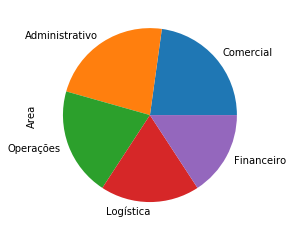

In [6]:
qtde_funcionarios_area = funcionarios_ps['Area'].value_counts()
print(qtde_funcionarios_area)
qtde_funcionarios_area.plot(kind='pie')

### 6 - Ticket Médio Mensal

In [7]:
ticket_medio = clientes_ps['Valor Contrato Mensal'].mean()
print('O ticket médio mensal é de R${:,.2f}'.format(ticket_medio))

O ticket médio mensal é de R$2,502.56
